# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [88]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
validation_file='/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p'
testing_file = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [89]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Below are randomly selected three images and their labels are 17, 2 and 12 respectively


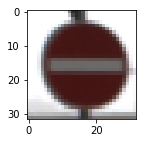

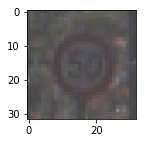

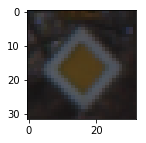

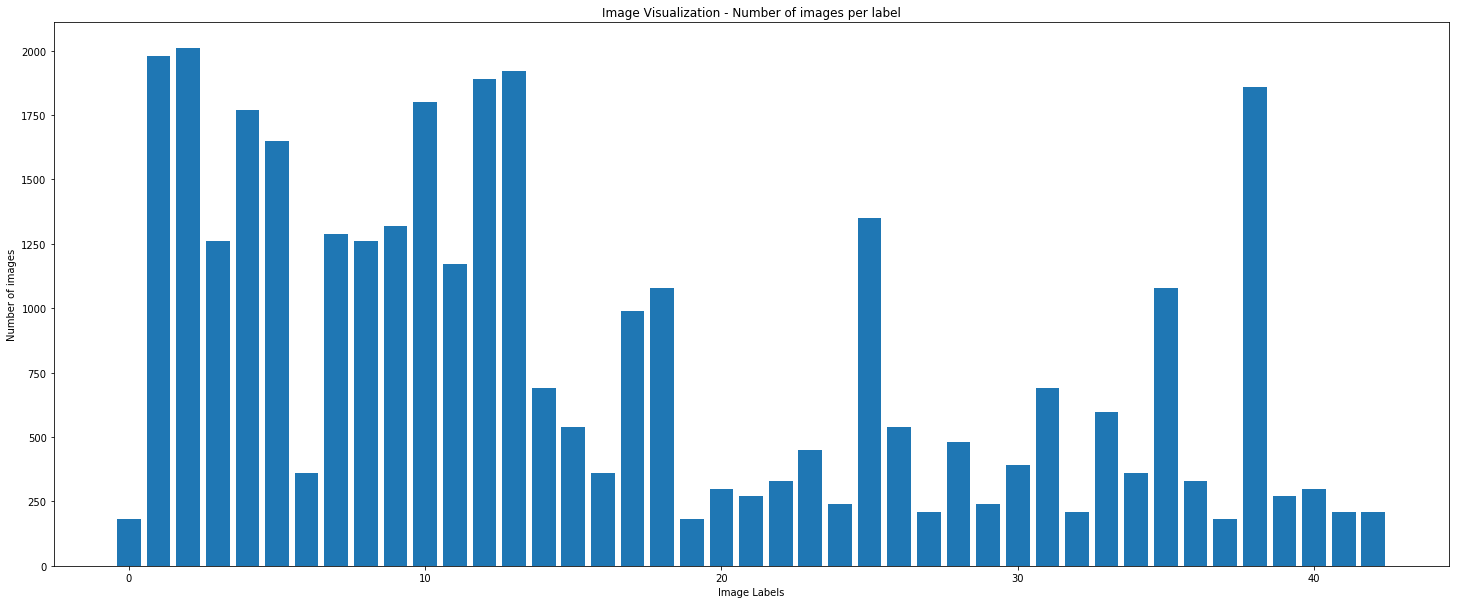

In [90]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
#Plotting randomly selected three images
%matplotlib inline
index = random.sample(range(0, len(X_train)),3)
image1 = X_train[index[0]].squeeze()

image2 = X_train[index[1]].squeeze()

image3 = X_train[index[2]].squeeze()
print('Below are randomly selected three images and their labels are {}, {} and {} respectively'.format(y_train[index[0]],y_train[index[1]],y_train[index[2]]))

plt.figure(figsize=(2,2))
plt.imshow(image1)

plt.figure(figsize=(2,2))
plt.imshow(image2)

plt.figure(figsize=(2,2))
plt.imshow(image3)

#Plotting a bar graph to count the number of images per label from the training set
#Setting the x and y axis arrays
x_plot = np.array(range(0,len(set(y_train))))
y_plot = np.int_(np.zeros(len(set(y_train))))
#Calculating the number of images per label and storing in y_plot array
count = 0
for t in range(0,len(x_plot)):
    temp = x_plot[t]
    count = 0
    for r in range(0,len(y_train)):
        if y_train[r]==temp:
            count = count+1
        else:
            count = count
    y_plot[t] = count

#Plotting the bar graph using plt.bar command
fig = plt.subplots(figsize=(25,10))
plt.bar(x_plot, y_plot)
plt.xlabel('Image Labels')
plt.ylabel('Number of images')
plt.title('Image Visualization - Number of images per label')
plt.show()




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [91]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Normalizing the data 
#As there are three layers representing the RGB colors, the simplest way to normalize the data is by subtracting them by 128 and dividing by 128
#Image_norm = (Image-128/128) will apply to all layers 
X_train_norm = np.zeros(X_train.shape)
X_train_norm = (X_train-128.)/128.


X_valid_norm = np.zeros(X_valid.shape)
X_valid_norm = (X_valid-128.)/128.


X_test_norm = np.zeros(X_test.shape)
X_test_norm = (X_test-128.)/128.





In [92]:
# Shuffling the training data
from sklearn.utils import shuffle

X_train_norm, y_train = shuffle(X_train_norm, y_train)

### Model Architecture

In [93]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#Setting the epochs and batch size for training accuracy and speed
import tensorflow as tf

EPOCHS = 16
BATCH_SIZE = 64

#Setting up the model architecture - using a Le-Net architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    Weight_Cnv1 = tf.Variable(tf.truncated_normal([5,5,3,6],mean = mu, stddev = sigma))
    Bias_Cnv1 = tf.Variable(tf.zeros(6))
    Cnv1 = tf.nn.conv2d(x, Weight_Cnv1, strides=[1, 1, 1, 1], padding='VALID')
    Cnv1 = tf.nn.bias_add(Cnv1,Bias_Cnv1 )
    
    
    # Activation.
    Cnv1 = tf.nn.relu(Cnv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    Cnv1 = tf.nn.max_pool(Cnv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    Weight_Cnv2 = tf.Variable(tf.truncated_normal([5,5,6,16],mean = mu, stddev = sigma))
    Bias_Cnv2 = tf.Variable(tf.zeros(16))
    Cnv2 = tf.nn.conv2d(Cnv1, Weight_Cnv2, strides=[1, 1, 1, 1], padding='VALID')
    Cnv2 = tf.nn.bias_add(Cnv2,Bias_Cnv2 )
    
    # Activation.
    Cnv2 = tf.nn.relu(Cnv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    Cnv2 = tf.nn.max_pool(Cnv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    Features = flatten(Cnv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    Weight_L3 = tf.Variable(tf.truncated_normal([400,120],mean = mu, stddev = sigma))
    Bias_L3 = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(Features, Weight_L3), Bias_L3)
    
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    Weight_L4 = tf.Variable(tf.truncated_normal([120,84],mean = mu, stddev = sigma))
    Bias_L4 = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1, Weight_L4), Bias_L4)
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    Weight_L5 = tf.Variable(tf.truncated_normal([84,43],mean = mu, stddev = sigma))
    Bias_L5 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, Weight_L5), Bias_L5)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [94]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [96]:
#Creating a training pipeline that uses the model to classify the German traffic signs data set
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [97]:
#Evaluating how well the loss and accuracy of the model for a given German traffic signs data set
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [98]:
#Running the training data through a training pipeline to train the model.
#Before each epoch the code shuffles the training set.
#After each epoch, measure the loss and accuracy of the validation set.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train_norm, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()    
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        #print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.913

Validation Accuracy = 0.840

EPOCH 2 ...
Training Accuracy = 0.964

Validation Accuracy = 0.891

EPOCH 3 ...
Training Accuracy = 0.964

Validation Accuracy = 0.894

EPOCH 4 ...
Training Accuracy = 0.982

Validation Accuracy = 0.907

EPOCH 5 ...
Training Accuracy = 0.984

Validation Accuracy = 0.923

EPOCH 6 ...
Training Accuracy = 0.994

Validation Accuracy = 0.926

EPOCH 7 ...
Training Accuracy = 0.986

Validation Accuracy = 0.926

EPOCH 8 ...
Training Accuracy = 0.994

Validation Accuracy = 0.918

EPOCH 9 ...
Training Accuracy = 0.988

Validation Accuracy = 0.924

EPOCH 10 ...
Training Accuracy = 0.995

Validation Accuracy = 0.937

EPOCH 11 ...
Training Accuracy = 0.995

Validation Accuracy = 0.945

EPOCH 12 ...
Training Accuracy = 0.995

Validation Accuracy = 0.936

EPOCH 13 ...
Training Accuracy = 0.994

Validation Accuracy = 0.930

EPOCH 14 ...
Training Accuracy = 0.997

Validation Accuracy = 0.933

EPOCH 15 ...
Training Accuracy

In [157]:
#Calculating the accuracy of the model with respect to test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.916


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Below are the 5 German traffic sign images that I pulled out from the internet:


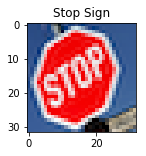

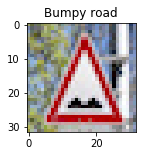

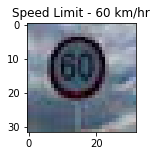

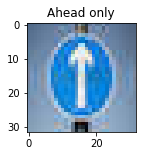

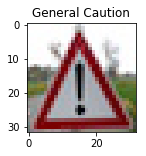

In [283]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


#Loading images
import cv2
Stop_Sign_Image = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/NEW_GERMAN_SIGNS/STOP_SIGN.png'
temp_image_stop = cv2.imread(Stop_Sign_Image)
temp_image_stop = cv2.cvtColor(temp_image_stop, cv2.COLOR_BGR2RGB)
Image1 = temp_image_stop.squeeze()

Bumpy_road_Image = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/NEW_GERMAN_SIGNS/bumpy_road.jpg'
temp_image_Bumpy_road = cv2.imread(Bumpy_road_Image)
temp_image_Bumpy_road = cv2.cvtColor(temp_image_Bumpy_road, cv2.COLOR_BGR2RGB)
Image2 = temp_image_Bumpy_road.squeeze()

speed_limit_60_Image = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/NEW_GERMAN_SIGNS/speed_limit_60.jpg'
temp_image_spd_lmt_60 = cv2.imread(speed_limit_60_Image)
temp_image_spd_lmt_60 = cv2.cvtColor(temp_image_spd_lmt_60, cv2.COLOR_BGR2RGB)
Image3 = temp_image_spd_lmt_60.squeeze()

Ahead_only_Image = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/NEW_GERMAN_SIGNS/ahead_only.jpg'
temp_image_Ahead_only = cv2.imread(Ahead_only_Image)
temp_image_Ahead_only = cv2.cvtColor(temp_image_Ahead_only, cv2.COLOR_BGR2RGB)
Image4 = temp_image_Ahead_only.squeeze()

General_caution_Image = '/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/NEW_GERMAN_SIGNS/General_Caution.jpg'
General_caution_only = cv2.imread(General_caution_Image)
General_caution_only = cv2.cvtColor(General_caution_only, cv2.COLOR_BGR2RGB)
Image5 = General_caution_only.squeeze()

#Plotting the images
print('Below are the 5 German traffic sign images that I pulled out from the internet:')

plt.figure(figsize=(2,2))
plt.title('Stop Sign')
plt.imshow(Image1)
plt.figure(figsize=(2,2))
plt.title('Bumpy road')
plt.imshow(Image2)
plt.figure(figsize=(2,2))
plt.title('Speed Limit - 60 km/hr')
plt.imshow(Image3)
plt.figure(figsize=(2,2))
plt.title('Ahead only')
plt.imshow(Image4)
plt.figure(figsize=(2,2))
plt.title('General Caution')
plt.imshow(Image5)
plt.show()


### Predict the Sign Type for Each Image

In [284]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Stacking all the images into one array
Five_new_images = np.array([temp_image_stop,temp_image_Bumpy_road,temp_image_spd_lmt_60,temp_image_Ahead_only,General_caution_only])
Five_new_images.shape

#Actual classID of the image which was refered from the signnames.csv file
Five_new_images_y = np.array([14,22,3,35,18])



In [285]:
#Preprocessing Image
Five_new_images_norm = np.zeros(Five_new_images.shape)
Five_new_images_norm = (Five_new_images-128.)/128.


In [286]:
#Predicting Image
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    image_predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: Five_new_images_norm})
    
import pandas as pd
df1=pd.read_csv("/Users/subratkam/CarND-Traffic-Sign-Classifier-Project/signnames.csv",index_col=0,usecols=['ClassId','SignName'])

print('The image prediction for Image 1 (stop sign) is {} i.e. class ID {}'.format(df1['SignName'][image_predictions[0]],image_predictions[0]))
print('The image prediction for Image 2 (Bumpy road sign) is {} i.e. class ID {}'.format(df1['SignName'][image_predictions[1]],image_predictions[1]))
print('The image prediction for Image 3 (Speed Limit of 60 km/hr sign) is {} i.e. class ID {}'.format(df1['SignName'][image_predictions[2]],image_predictions[2]))
print('The image prediction for Image 4 (Ahead only sign) is {} i.e. class ID {}'.format(df1['SignName'][image_predictions[3]],image_predictions[3]))
print('The image prediction for Image 5 (General caution sign) is {} i.e. class ID {}'.format(df1['SignName'][image_predictions[4]],image_predictions[4]))

The image prediction for Image 1 (stop sign) is Stop i.e. class ID 14
The image prediction for Image 2 (Bumpy road sign) is Bumpy road i.e. class ID 22
The image prediction for Image 3 (Speed Limit of 60 km/hr sign) is Speed limit (120km/h) i.e. class ID 8
The image prediction for Image 4 (Ahead only sign) is Ahead only i.e. class ID 35
The image prediction for Image 5 (General caution sign) is General caution i.e. class ID 18


### Analyze Performance

In [287]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#Calculating how many of the predicted class ID's matched with the actual class ID's
Num_equal = np.sum(Five_new_images_y == image_predictions)
#Calculating the accuracy percentage of the model on the images
Accuracy_new_images = ((Num_equal/len(Five_new_images_y))*100)
print('The accuracy of the model for the 5 new images is {}%'.format(Accuracy_new_images))

The accuracy of the model for the 5 new images is 80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [306]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    image_softmax_new = sess.run(tf.nn.softmax(logits), feed_dict={x: Five_new_images_norm})
    Top_five_softmax = sess.run(tf.nn.top_k(tf.constant(image_softmax_new), k=5))

print('The top five softmax probabilities for the Image 1 i.e. Stop sign prediction are: \n{}'. format(Top_five_softmax.values[0]))
print('The top five softmax predictions for the Image 1 are: \n{}\n'.format(df1['SignName'][np.array(Top_five_softmax.indices[0])]))

print('The top five softmax probabilities for the Image 2 i.e. Bumpy road sign prediction are: \n{} '. format(Top_five_softmax.values[1]))
print('The top five softmax predictions for the Image 2 are: \n{}\n'.format(df1['SignName'][np.array(Top_five_softmax.indices[1])]))

print('The top five softmax probabilities for the Image 3 i.e. Speed limit of 60 km/hr sign prediction are: \n{} '. format(Top_five_softmax.values[2]))
print('The top five softmax predictions for the Image 3 are: \n{}\n'.format(df1['SignName'][np.array(Top_five_softmax.indices[2])]))

print('The top five softmax probabilities for the Image 4 i.e. Ahead only sign prediction are: \n{} '. format(Top_five_softmax.values[3]))
print('The top five softmax predictions for the Image 4 are: \n{}\n'.format(df1['SignName'][np.array(Top_five_softmax.indices[3])]))

print('The top five softmax probabilities for the Image 5 i.e. General caution sign prediction are: \n{} '. format(Top_five_softmax.values[4]))
print('The top five softmax predictions for the Image 5 are: \n{}\n'.format(df1['SignName'][np.array(Top_five_softmax.indices[4])]))




The top five softmax probabilities for the Image 1 i.e. Stop sign prediction are: 
[  1.00000000e+00   4.49418565e-08   2.88376295e-10   1.00368238e-11
   3.36159865e-13]
The top five softmax predictions for the Image 1 are: 
ClassId
14                    Stop
29       Bicycles crossing
3     Speed limit (60km/h)
1     Speed limit (30km/h)
5     Speed limit (80km/h)
Name: SignName, dtype: object

The top five softmax probabilities for the Image 2 i.e. Bumpy road sign prediction are: 
[  1.00000000e+00   4.86550770e-25   7.64814370e-28   1.50241028e-29
   3.53226384e-32] 
The top five softmax predictions for the Image 2 are: 
ClassId
22                      Bumpy road
20    Dangerous curve to the right
26                 Traffic signals
25                       Road work
29               Bicycles crossing
Name: SignName, dtype: object

The top five softmax probabilities for the Image 3 i.e. Speed limit of 60 km/hr sign prediction are: 
[  8.57222497e-01   1.42455995e-01   2.38559427e-04

Note: Below code is to save the exploration training dataset plot in the form of a jpg, had forgotten to do it above and can't run the above code again as it will disturb the order of how the code was run

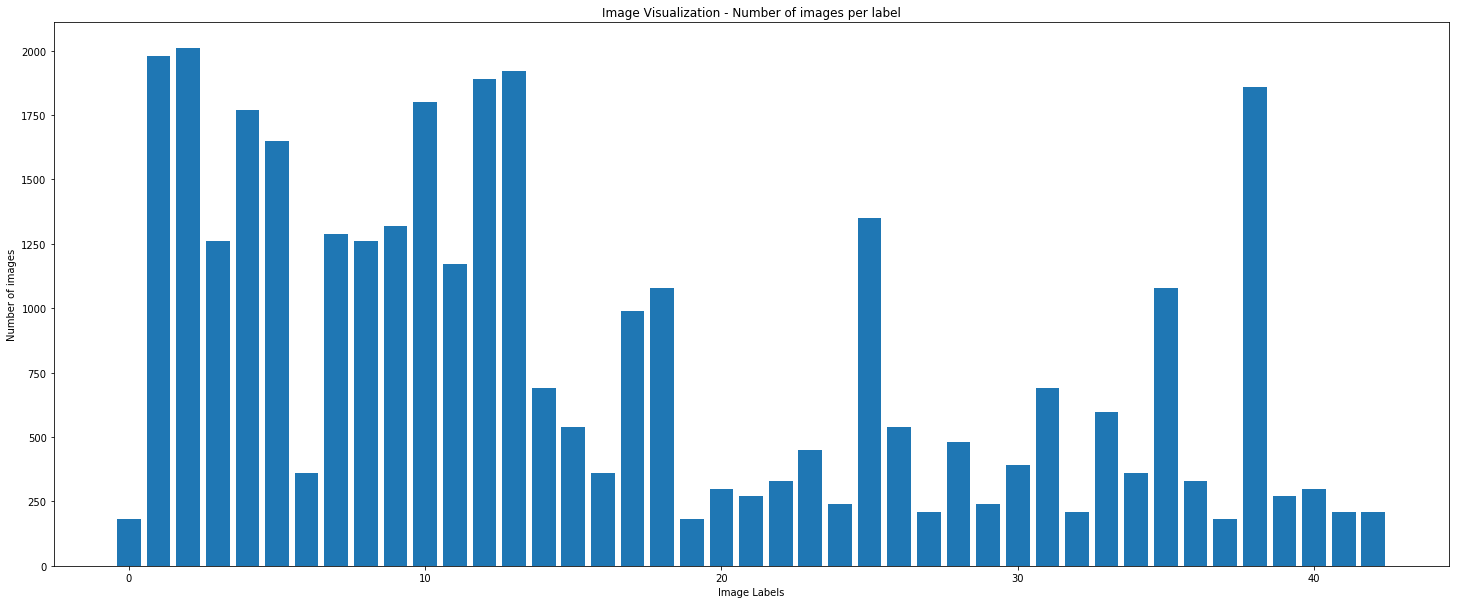

Validation set is of length 4410


In [307]:
#Had forgotten to save the exploration training dataset plot as a jpg image so doing it here instead of disturbing anything above
fig = plt.subplots(figsize=(25,10))
plt.bar(x_plot, y_plot)
plt.xlabel('Image Labels')
plt.ylabel('Number of images')
plt.title('Image Visualization - Number of images per label')
plt.savefig('Exploratory_visualization.jpg')
plt.close
plt.show()

#Also calculating the length of the validation set
Valid_length = len(X_valid)
print("Validation set is of length {}".format(Valid_length))


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 